# **Gillete Sentiment Analysis**
# **Hasbi Thaufik Oktodila**

# **Introduction**

# **Importing Libraries**

In [25]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings(action='ignore')

# **Twitter Scraping**

Here, we will gather the tweet data when the gilette's ad was released, which is in January 15th of 2019 and two dates after that (16th and 17th).

In [26]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('gilette since:2019-01-15 until:2019-01-17 lang:en').get_items()):
    attributes_container.append([tweet.date, tweet.content])
    
# Creating a dataframe to load the list
gilette_tweets = pd.DataFrame(attributes_container, columns=["Date", "Tweet"])

In [27]:
gilette_tweets

In [28]:
gilette_tweets.to_csv('gilette_tweets.csv')

In [29]:
df = pd.read_csv('gilette_tweets.csv')

Creating Function to clean the text

In [30]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9_"]+', '', text) # Removing mentions
    text = re.sub(r'#', '', text) # Removing hastags
    text = re.sub(r'RT', '', text) # Removing RT
    text = re.sub(r'https?:\/\/S+', '', text) # Remove hyperlink
    
    return text

In [31]:
df['Tweet_Cleaned'] = df['Tweet'].apply(cleanTxt)
df

,Unnamed: 0,Date,Tweet,Tweet_Cleaned
0,0,2019-01-16 23:59:47+00:00,@sadieC137 Gilette is basically saying Men in ...,Gilette is basically saying Men in general ar...
1,1,2019-01-16 23:58:38+00:00,@m_sheena_ @shadesintherain I'm not bashing. I...,I'm not bashing. I'm talking about the peopl...
2,2,2019-01-16 23:58:16+00:00,@shadesintherain The gilette commercial lol,The gilette commercial lol
3,3,2019-01-16 23:58:06+00:00,"@slpng_giants_oz ""Gilette, the Best a Real Man...","""Gilette, the Best a Real Man can get!"" are y..."
4,4,2019-01-16 23:56:39+00:00,"@RoamingMil Gilette: ""Don't be a piece of shit...","Gilette: ""Don't be a piece of shit. Be a posi..."
...,...,...,...,...
4772,4772,2019-01-15 00:06:30+00:00,Confused as to why people are offended by this...,Confused as to why people are offended by this...
4773,4773,2019-01-15 00:06:19+00:00,@chuckgose @Gillette Did you buy some Gilette ...,Did you buy some Gilette razors? THAT's a pe...
4774,4774,2019-01-15 00:05:24+00:00,And in under 2 minutes I'm sparked to shave m...,And in under 2 minutes I'm sparked to shave m...
4775,4775,2019-01-15 00:01:57+00:00,"wow, just had the new #Gilette ad pop up, i gu...","wow, just had the new Gilette ad pop up, i gue..."


Function to show subjectivity

In [32]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [33]:
df['subjectivity'] = df['Tweet_Cleaned'].apply(get_subjectivity)
df['polarity'] = df['Tweet_Cleaned'].apply(get_polarity)

df

,Unnamed: 0,Date,Tweet,Tweet_Cleaned,subjectivity,polarity
0,0,2019-01-16 23:59:47+00:00,@sadieC137 Gilette is basically saying Men in ...,Gilette is basically saying Men in general ar...,0.750000,-0.475000
1,1,2019-01-16 23:58:38+00:00,@m_sheena_ @shadesintherain I'm not bashing. I...,I'm not bashing. I'm talking about the peopl...,0.000000,0.000000
2,2,2019-01-16 23:58:16+00:00,@shadesintherain The gilette commercial lol,The gilette commercial lol,0.350000,0.400000
3,3,2019-01-16 23:58:06+00:00,"@slpng_giants_oz ""Gilette, the Best a Real Man...","""Gilette, the Best a Real Man can get!"" are y...",0.400000,0.650000
4,4,2019-01-16 23:56:39+00:00,"@RoamingMil Gilette: ""Don't be a piece of shit...","Gilette: ""Don't be a piece of shit. Be a posi...",0.670707,-0.282576
...,...,...,...,...,...,...
4772,4772,2019-01-15 00:06:30+00:00,Confused as to why people are offended by this...,Confused as to why people are offended by this...,0.680000,0.260000
4773,4773,2019-01-15 00:06:19+00:00,@chuckgose @Gillette Did you buy some Gilette ...,Did you buy some Gilette razors? THAT's a pe...,1.000000,1.000000
4774,4774,2019-01-15 00:05:24+00:00,And in under 2 minutes I'm sparked to shave m...,And in under 2 minutes I'm sparked to shave m...,0.200000,0.200000
4775,4775,2019-01-15 00:01:57+00:00,"wow, just had the new #Gilette ad pop up, i gu...","wow, just had the new Gilette ad pop up, i gue...",0.715152,0.034545


**Word Cloud**

<function matplotlib.pyplot.show(*args, **kw)>

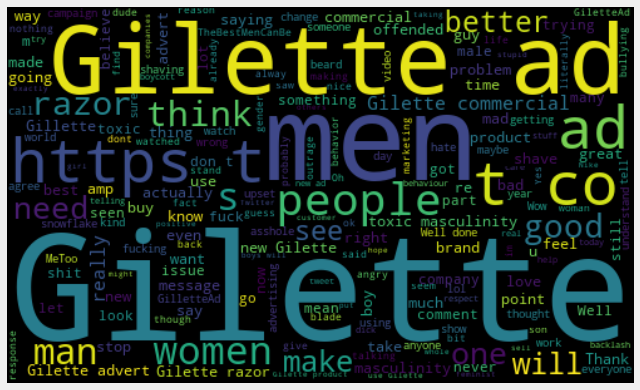

In [34]:
allwords = ' '.join([twts for twts in df['Tweet_Cleaned']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.figure(figsize = (10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show

Function to compute positive, negative and neutral analysis 

In [35]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['polarity'].apply(getAnalysis)
df

,Unnamed: 0,Date,Tweet,Tweet_Cleaned,subjectivity,polarity,Analysis
0,0,2019-01-16 23:59:47+00:00,@sadieC137 Gilette is basically saying Men in ...,Gilette is basically saying Men in general ar...,0.750000,-0.475000,Negative
1,1,2019-01-16 23:58:38+00:00,@m_sheena_ @shadesintherain I'm not bashing. I...,I'm not bashing. I'm talking about the peopl...,0.000000,0.000000,Neutral
2,2,2019-01-16 23:58:16+00:00,@shadesintherain The gilette commercial lol,The gilette commercial lol,0.350000,0.400000,Positive
3,3,2019-01-16 23:58:06+00:00,"@slpng_giants_oz ""Gilette, the Best a Real Man...","""Gilette, the Best a Real Man can get!"" are y...",0.400000,0.650000,Positive
4,4,2019-01-16 23:56:39+00:00,"@RoamingMil Gilette: ""Don't be a piece of shit...","Gilette: ""Don't be a piece of shit. Be a posi...",0.670707,-0.282576,Negative
...,...,...,...,...,...,...,...
4772,4772,2019-01-15 00:06:30+00:00,Confused as to why people are offended by this...,Confused as to why people are offended by this...,0.680000,0.260000,Positive
4773,4773,2019-01-15 00:06:19+00:00,@chuckgose @Gillette Did you buy some Gilette ...,Did you buy some Gilette razors? THAT's a pe...,1.000000,1.000000,Positive
4774,4774,2019-01-15 00:05:24+00:00,And in under 2 minutes I'm sparked to shave m...,And in under 2 minutes I'm sparked to shave m...,0.200000,0.200000,Positive
4775,4775,2019-01-15 00:01:57+00:00,"wow, just had the new #Gilette ad pop up, i gu...","wow, just had the new Gilette ad pop up, i gue...",0.715152,0.034545,Positive


In [36]:
# Count the positive sentiment
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweet_Cleaned'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.
556) Good job Gilette. Anyone who complains about this ad just outed themselves as the subject of it.

557) If you're offended by the new Gilette ad, you should take some time and think (for once) about who you are, as a person, evaluate your priorities, your life choices, and most importantly, stop being an ass.

558) I just want to point out that they’re arguing over a razor ad.... a razor ad.... a razor ad... the PR team of Gilette already won the war lol 

Also lol to the men who are apparently boycotting gilette HAHAHAH it’s just a razor

559) Being a DAD is 24/7. So GILETTE I don’t like your add. Because, just like society. Just like all media. Just like the press. Just like the legal system, it is discriminatory against MEN.

560) I feel like Gilette is updating their marketing to mirror current social and cultural trends. This isn't good or bad. Just business

561)  completely agree with you on the commercial. The message is ba

In [38]:
# Print all Negative Tweets
j=1
sortedDF = df.sort_values(by=['polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j) +') '+ sortedDF['Tweet_Cleaned'][i])
    print()
    j=j+1

1)  Gilette is basically saying Men in general are a problem.  As if Women don't do horrible things to Men.

2)  Gilette: "Don't be a piece of shit. Be a positive influence on the world."

Right-Wing Crazies: "Reeeeeeeeee... It say all men bad!"

3)    This ad is not an attack on men, but a call to action. It asks all men to JOIN that call, and to do their part, however they can, to make the world better by not letting toxic behavior stand. It's just somewhat targeted at Gilette's mostly-male customer base.

4) I love the controversy  has created with their new ad. Shows it works. Engagement is through the roof.

Something about people that boycott them:
"People throwing out their Gillette products shouldn’t use razors anyway. It’s dangerous to shave such thin skin."
Gilette

5)  The fallout among some from this campaign goes to show that perhaps Gilette does not work well for sensitive skin...

But in all seriousness, there are a lot of other things to boycott P&amp;G over as opposed 

Note : The text blob polarity semms not really accurate.

Note for improvement. Try transfer learning for better labeling process.